<a href="https://colab.research.google.com/github/bognix/Machine-Learning-Playground/blob/main/digits_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [39]:
from fastbook import *

In [40]:
# this may not work in colab
from fastai.vision.widgets import *

In [41]:
path = untar_data(URLs.MNIST)
fns = get_image_files(path)

## Check what's downloaded

In [42]:
(path/'training').ls()

(#10) [Path('/Users/bognaflieger/.fastai/data/mnist_png/training/9'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/0'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/7'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/6'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/1'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/8'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/4'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/3'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/2'),Path('/Users/bognaflieger/.fastai/data/mnist_png/training/5')]

In [43]:
path.ls()

(#2) [Path('/Users/bognaflieger/.fastai/data/mnist_png/training'),Path('/Users/bognaflieger/.fastai/data/mnist_png/testing')]

In [44]:
threes = (path/'training'/'3').ls().sorted()
# Image comes from Python Imaging Library (PIL)
Image.open(threes[0])

In [45]:
# Representation of each number
img_3_path = threes[1]
img_3 = Image.open(img_3_path)
img_3

# tensor is PyTorch tensor
tensor(img_3)[4:14,4:24]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0,   0,   0,   0,   0],
        [ 

In [46]:
# Create drawing based on the tensor
img_3_tensor = tensor(img_3)
df = pd.DataFrame(img_3_tensor[4:14,4:24])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0,0,0


In [57]:
# Create tensor for each digit
tensors = {}

training_paths = (path/'training').ls().sorted()
training_paths

for p in training_paths:
    tensors[p.parts[-1]] = [tensor(Image.open(digit_path)) for digit_path in (path/p).ls().sorted()]


<Axes: >

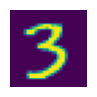

In [58]:
show_image(tensors['3'][1])

In [74]:
# Stack tensors for each digit into single tensor
stacked = {}
for digit, t in tensors.items():
    stacked[digit] = torch.stack(t).float()/255


# <number_of_images, height, width>
# returns the length of each axis
stacked['3'].shape

torch.Size([6131, 28, 28])

In [75]:
stacked['3'].ndim

3

In [71]:
stacked['3'][0].shape

torch.Size([28, 28])

In [76]:
stacked['3'][0].ndim

2

In [77]:
stacked['3'][0][0].shape

torch.Size([28])

In [79]:
stacked['3'][0][0].ndim

1

In [82]:
# calculate mean/average image for each digit
means = {}
for digit, stack in stacked.items():
    # mean from the dimiension 0 - mean for each image
    means[digit] = stack.mean(0)

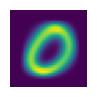

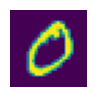

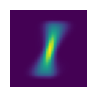

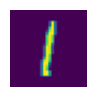

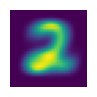

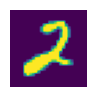

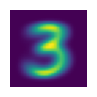

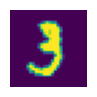

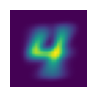

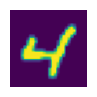

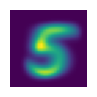

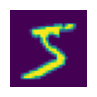

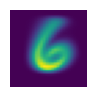

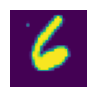

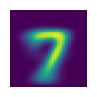

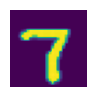

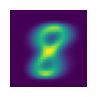

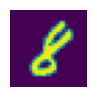

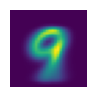

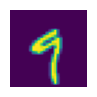

In [84]:
for digit, m in means.items():
    show_image(means[digit])
    show_image(stacked[digit][0])

In [91]:
# Compute how different first image of "1" is different from the average image of each digit
a_one = stacked['1'][0]
for digit in means.keys():
    mean_digit = means[digit]
    dist_abs = (a_one - mean_digit).abs().mean()
    dist_sqr = ((a_one - mean_digit)**2).mean().sqrt()

    print(digit, dist_abs, dist_sqr)
            
    

0 tensor(0.1806) tensor(0.3065)
1 tensor(0.0530) tensor(0.1335)
2 tensor(0.1449) tensor(0.2479)
3 tensor(0.1360) tensor(0.2435)
4 tensor(0.1393) tensor(0.2620)
5 tensor(0.1288) tensor(0.2256)
6 tensor(0.1332) tensor(0.2471)
7 tensor(0.1242) tensor(0.2451)
8 tensor(0.1341) tensor(0.2369)
9 tensor(0.1291) tensor(0.2486)


In [12]:
digits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
  item_tfms=Resize(128))

dls = digits.dataloaders(path)

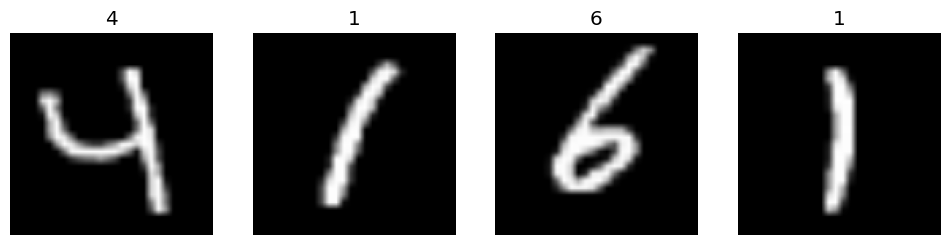

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
digits = digits.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2, do_flip=False))
dls = digits.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.470359,0.144950,0.044786,02:25


epoch,train_loss,valid_loss,error_rate,time
0,0.106215,0.034752,0.010286,02:31
1,0.065280,0.020791,0.005929,02:29
2,0.040668,0.022248,0.005857,02:31
3,0.026754,0.017273,0.004429,02:29
4,0.023974,0.016928,0.004143,02:31


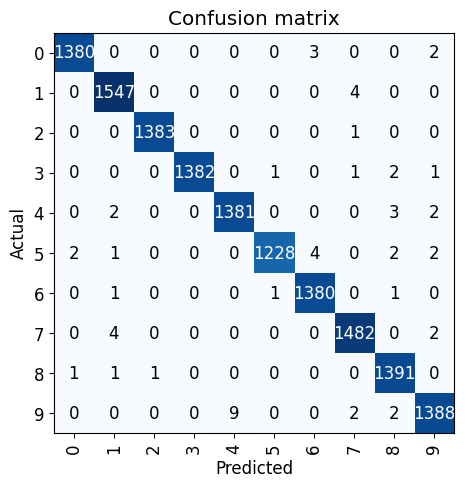

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

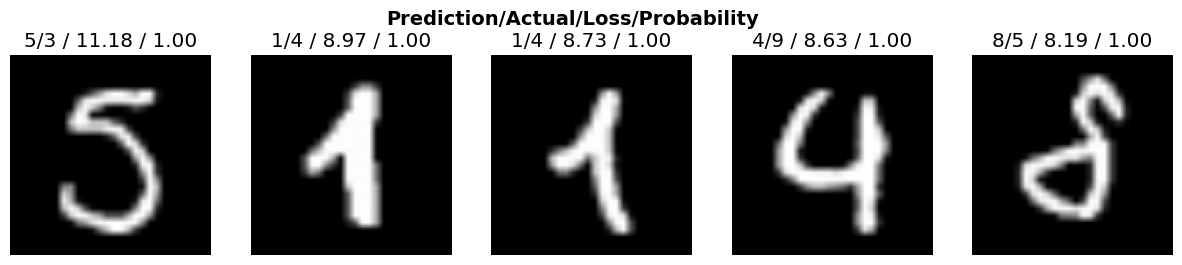

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
# after cleaning the data we can train the model again

In [ ]:
learn.export()